In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats import diagnostic
from scipy import stats

In [2]:
#RateBeer website data :

df_beer = pd.read_csv("RateBeer/beers.csv", index_col='beer_id')
df_breweries  = pd.read_csv("RateBeer/breweries.csv")
df_users = pd.read_csv("RateBeer/users.csv")
df_review = pd.read_csv("RateBeer/reviews.txt", on_bad_lines='skip') #pas ouf

In [3]:
df_review.head(20)
#print(df_review.iloc[0:13])

,beer_name: 33 Export (Gabon)
0,beer_id: 410549
1,brewery_name: Sobraga
2,brewery_id: 3198
3,style: Pale Lager
4,abv: 5.0
5,date: 1461664800
6,user_name: Manslow
7,user_id: 175852
8,appearance: 2
9,aroma: 4


In [21]:
df_breweries

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3
...,...,...,...,...
24184,28180,Albania,Shoqeria Picana,1
24185,1107,Albania,Stefani & Co,11
24186,9355,Albania,Hotel Martini,1
24187,9928,Albania,Rozafa Brewery,1


In [35]:
df_beer

,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
beer_id,,,,,,,,,,,,,
410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN


In [208]:
df_rating.columns

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name', 'abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1'],
      dtype='object')

In [15]:
df_users

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


In [37]:
print(df_beer.index.is_unique, df_users.index.is_unique)

True True


### Data exploration on Beers 

In [51]:
df_beer['nbr_ratings'].describe()

count    442081.000000
mean         16.110337
std          80.988812
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        5272.000000
Name: nbr_ratings, dtype: float64

In [54]:
#Testing if the nbr_ratings is normally distributed
diagnostic.kstest_normal(df_beer['nbr_ratings'].values, dist = 'norm')
#If the p-value (second output) is less than 0.05, then the null hypothesis is rejected and the data is not normally distributed.

(0.42116245588779955, 0.0009999999999998899)

In [55]:
#Testing if the nbr_ratings is exponentially distributed
diagnostic.kstest_normal(df_beer['nbr_ratings'].values, dist = 'exp')
#If the p-value (second output) is less than 0.05, then the null hypothesis is rejected and the data is not normally distributed.

(0.4045413319598877, 0.0009999999999998899)

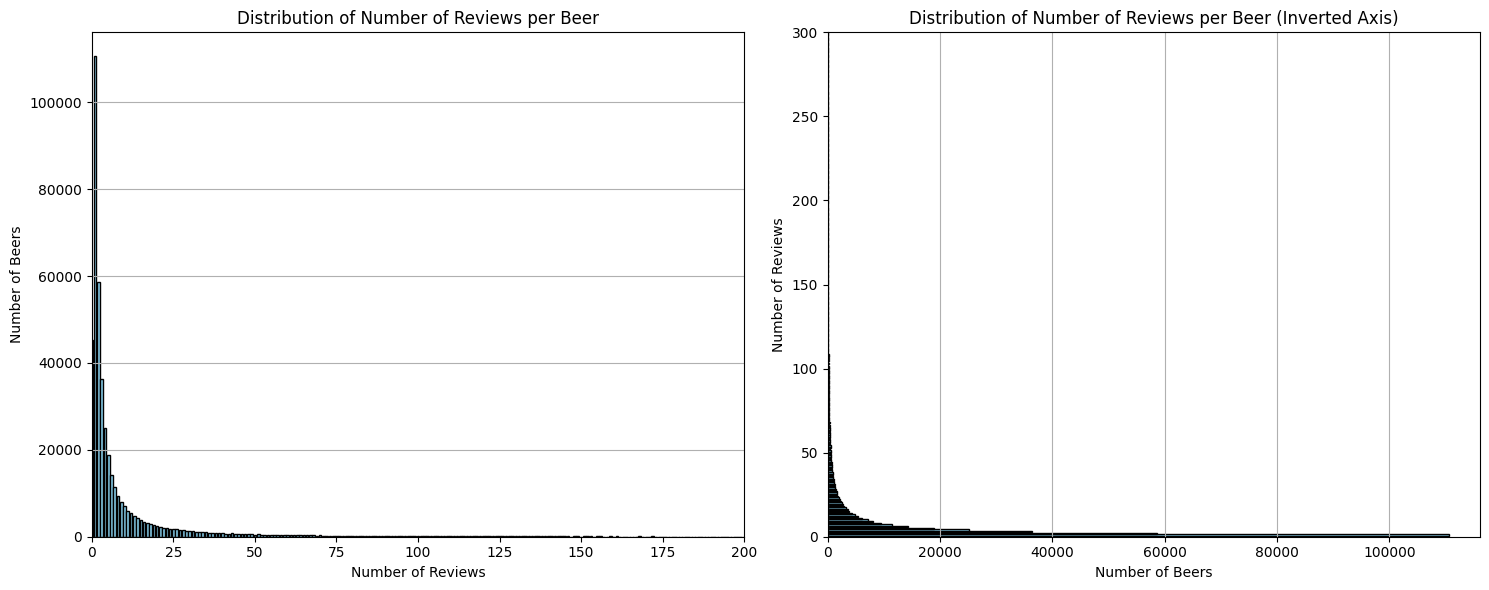

In [50]:
# Count the number of beers for each number of reviews
reviews_counts = df_beer['nbr_ratings'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: Original axis
axes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Number of Beers')
axes[0].set_title('Distribution of Number of Reviews per Beer')
axes[0].grid(axis='y')

# Plot 2: Inverted axis
axes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of Beers')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_title('Distribution of Number of Reviews per Beer (Inverted Axis)')
axes[1].grid(axis='x')


axes[1].set_ylim(0, 300) 
axes[0].set_xlim(0, 200) 

plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()

In [67]:
# Choose a percentile threshold (adjust as needed)
ratings_threshold75 = df_beer['nbr_ratings'].quantile(0.75)
ratings_threshold90 = df_beer['nbr_ratings'].quantile(0.90)
ratings_threshold95 = df_beer['nbr_ratings'].quantile(0.95)
ratings_threshold98 = df_beer['nbr_ratings'].quantile(0.98)
ratings_threshold99 = df_beer['nbr_ratings'].quantile(0.99)

# Filter beers based on the threshold
filtered_beers75 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold75]
filtered_beers90 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold90]
filtered_beers95 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold95]
filtered_beers98 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold98]
filtered_beers99 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold99]

print(filtered_beers75.shape,
filtered_beers90.shape,
filtered_beers95.shape,
filtered_beers98.shape,
filtered_beers99.shape)

(112028, 13) (44752, 13) (22228, 13) (8914, 13) (4428, 13)


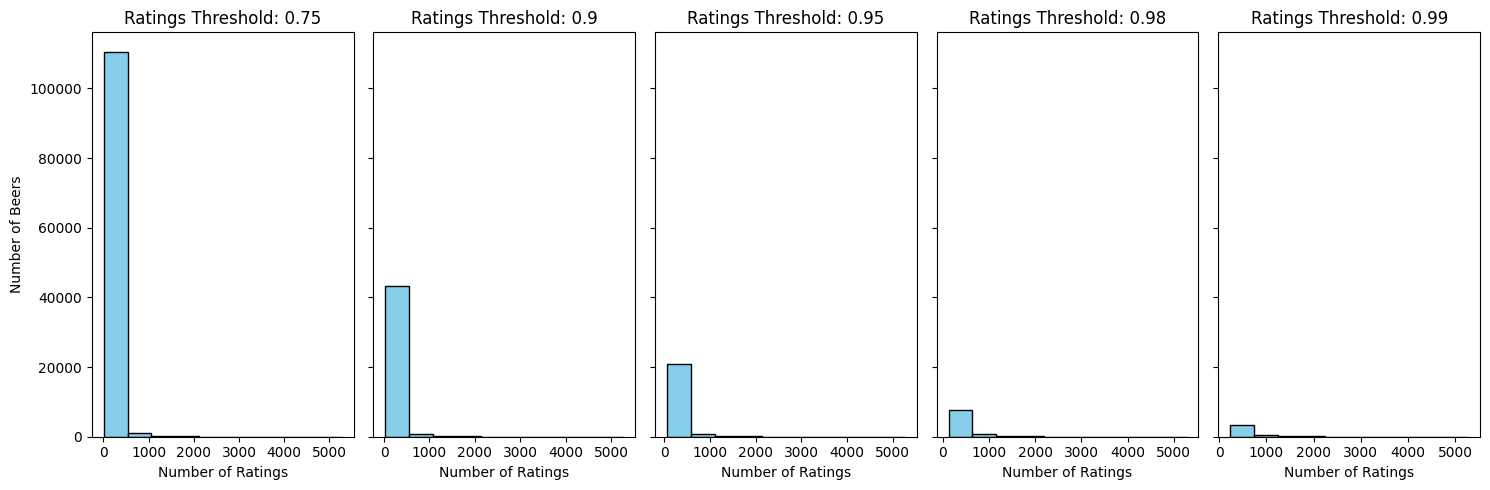

In [82]:
# Choose percentile thresholds (adjust as needed)
ratings_thresholds = [0.75, 0.90, 0.95, 0.98, 0.99]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(ratings_thresholds), figsize=(15, 5), sharey=True)

# Plot histograms for different percentile thresholds
for i, threshold in enumerate(ratings_thresholds):
    # Filter beers based on the threshold
    filtered_beers = df_beer[df_beer['nbr_ratings'] >= df_beer['nbr_ratings'].quantile(threshold)]

    # Plot the histogram
    axes[i].hist(filtered_beers['nbr_ratings'], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Ratings Threshold: {threshold}')
    axes[i].set_xlabel('Number of Ratings')

# Set common y-axis label
axes[0].set_ylabel('Number of Beers')

plt.tight_layout()
plt.show()

In [119]:
# Choose the 99th percentile threshold for nbr_ratings
ratings_threshold99 = df_beer['nbr_ratings'].quantile(0.99)

# Create a new DataFrame with beers in the 99th percentile
df_filtered_beer = df_beer[df_beer['nbr_ratings'] >= ratings_threshold99]

# Display the new DataFrame
display(df_filtered_beer)

,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,nbr_ratings_zscore,ratings_zscore
beer_id,,,,,,,,,,,,,,,
3126,Tiger Beer,547,Singapore Brewery (Asia Pacific Breweries-Hein...,Pale Lager,1556,5.0,50.0,2.13,5.0,2.138560,NaN,0,NaN,19.013631,19.013631
51355,Lucky Beer (Lucky Buddha),11483,Cheerday Hangzhou Qiandaohu Beer Co.,Pale Lager,595,2.0,31.0,1.92,4.8,1.943361,NaN,0,NaN,7.147781,7.147781
17334,Harbin Beer,2951,Harbin Beer Company (AB InBev),Pale Lager,318,3.0,40.0,2.01,4.8,2.009119,NaN,0,NaN,3.727552,3.727552
730,Tsingtao,116,Tsingtao Brewery,Pale Lager,2031,3.0,42.0,2.03,4.8,2.045790,NaN,0,NaN,24.878645,24.878645
47351,Timișoreana,2300,Ursus Breweries (SABMiller),Pale Lager,290,6.0,69.0,2.26,5.0,2.285862,NaN,0,NaN,3.381825,3.381825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,Zlatý Baant (12% / Golden Pheasant / Premium),443,Heineken Slovensko,Czech Pilsner (Světlý),904,15.0,29.0,2.68,5.0,2.685509,NaN,0,NaN,10.963127,10.963127
11012,Kenya Tusker Lager,1521,Kenya Breweries (EABL/East African Breweries -...,Pale Lager,1085,5.0,52.0,2.14,4.2,2.155115,NaN,0,NaN,13.198007,13.198007
17078,Leo Beer,178,Boon Rawd Brewery,Pale Lager,282,1.0,19.0,1.80,5.0,1.878369,NaN,0,NaN,3.283046,3.283046


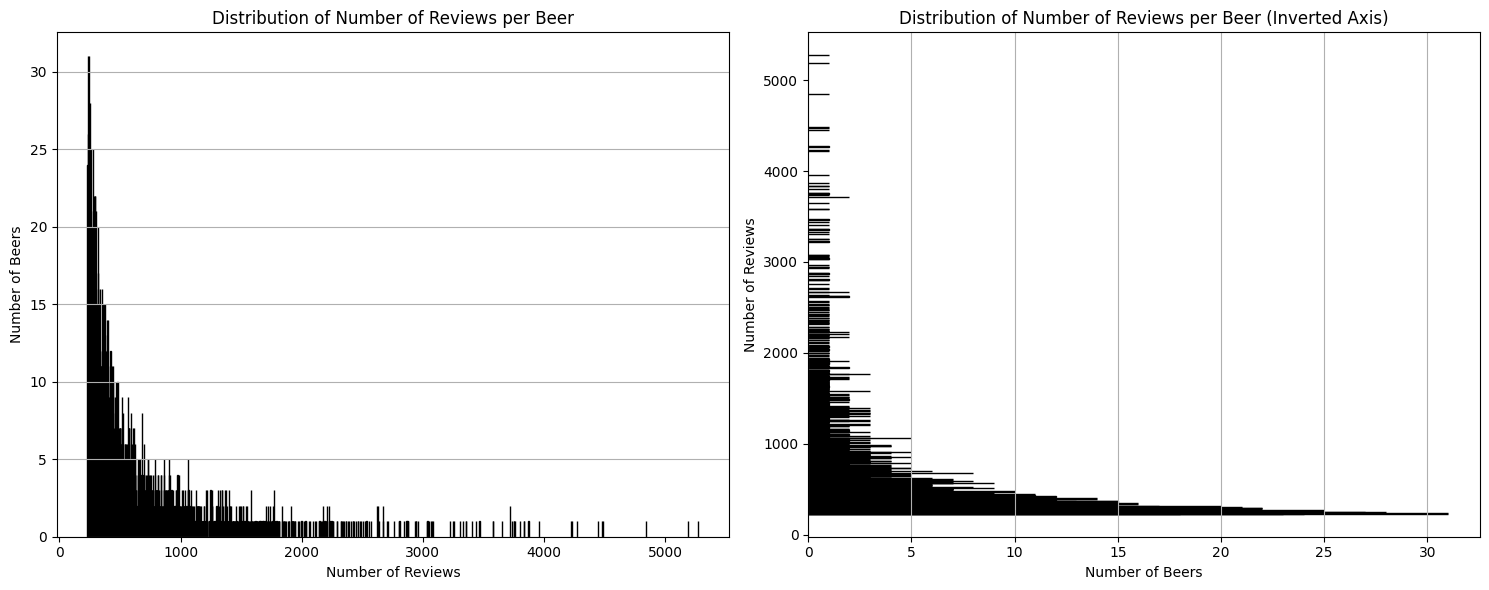

In [120]:
# Count the number of beers for each number of reviews
reviews_counts = df_filtered_beer['nbr_ratings'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: Original axis
axes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Number of Beers')
axes[0].set_title('Distribution of Number of Reviews per Beer')
axes[0].grid(axis='y')

# Plot 2: Inverted axis
axes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of Beers')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_title('Distribution of Number of Reviews per Beer (Inverted Axis)')
axes[1].grid(axis='x')


#axes[1].set_ylim(0, 300) 
#axes[0].set_xlim(0, 200) 

plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()

In [73]:
# Explore the Zscore 
print(df_beer['zscore'].describe())


count    42228.000000
mean        -0.103137
std          0.884693
min         -5.801118
25%         -0.623827
50%         -0.044782
75%          0.482017
max          3.804717
Name: zscore, dtype: float64


In [100]:
df_beer2 = df_beer[df_beer['zscore'] != 0].copy()
print(df_beer2['zscore'].describe())
# If we compare these rresults with the raw data, basically nothing changes. 

count    42228.000000
mean        -0.103137
std          0.884693
min         -5.801118
25%         -0.623827
50%         -0.044782
75%          0.482017
max          3.804717
Name: zscore, dtype: float64


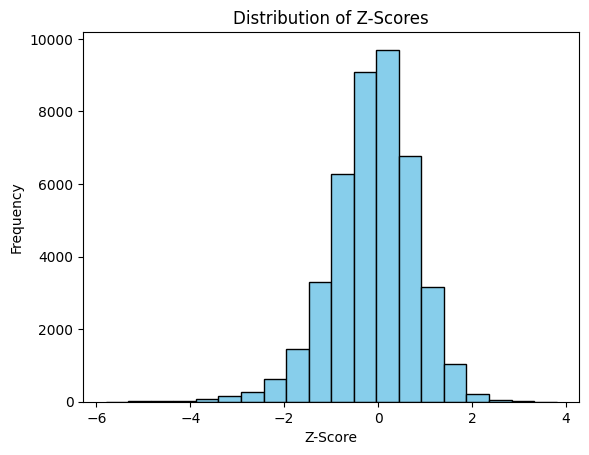

In [74]:
plt.hist(df_beer['zscore'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-Scores')
plt.show()

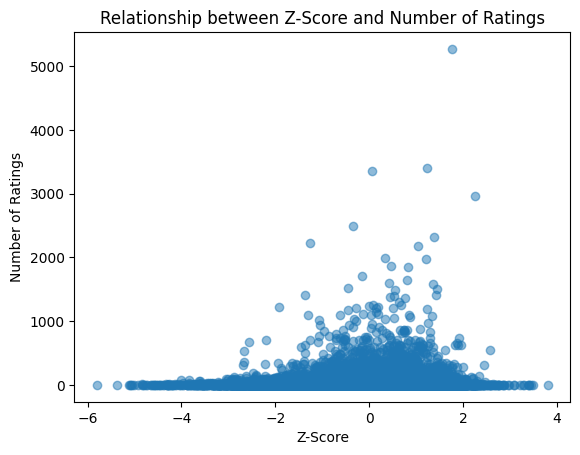

In [81]:
plt.scatter(df_beer['zscore'], df_beer['nbr_ratings'], alpha=0.5)
plt.xlabel('Z-Score')
plt.ylabel('Number of Ratings')
plt.title('Relationship between Z-Score and Number of Ratings')
plt.show()

In [93]:
# Explore the overall_score 
print(df_beer['overall_score'].describe())

count    104028.000000
mean         55.680817
std          28.482652
min           0.000000
25%          34.000000
50%          53.000000
75%          83.000000
max         100.000000
Name: overall_score, dtype: float64


In [101]:
df_beer2 = df_beer[df_beer['overall_score'] != 0].copy()
print(df_beer2['overall_score'].describe())
# If we compare these rresults with the raw data, basically nothing changes. 

count    103737.000000
mean         55.837011
std          28.369274
min           1.000000
25%          35.000000
50%          53.000000
75%          83.000000
max         100.000000
Name: overall_score, dtype: float64


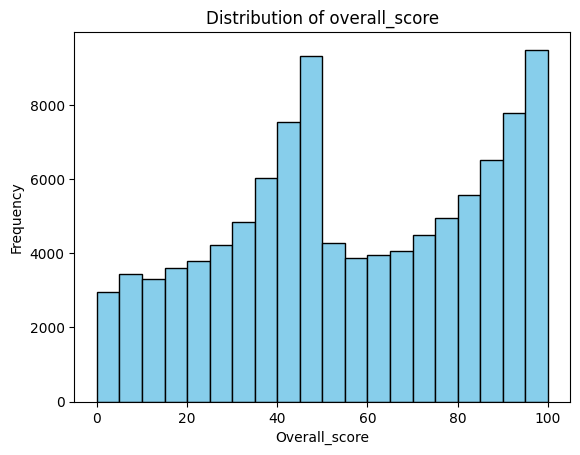

In [94]:
plt.hist(df_beer['overall_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Overall_score')
plt.ylabel('Frequency')
plt.title('Distribution of overall_score')
plt.show()

### Data exploration on Users

In [102]:
df_users

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


In [111]:
# Explore the nbr_ratings
print(df_users['nbr_ratings'].describe())

count    70174.000000
mean       108.820945
std        754.493211
min          1.000000
25%          1.000000
50%          2.000000
75%         10.000000
max      46749.000000
Name: nbr_ratings, dtype: float64


In [109]:
#Testing if the nbr_ratings is normally distributed
diagnostic.kstest_normal(df_users['nbr_ratings'].values, dist = 'norm')
#If the p-value (second output) is less than 0.05, then the null hypothesis is rejected and the data is not normally distributed.

(0.4431825562725818, 0.0009999999999998899)

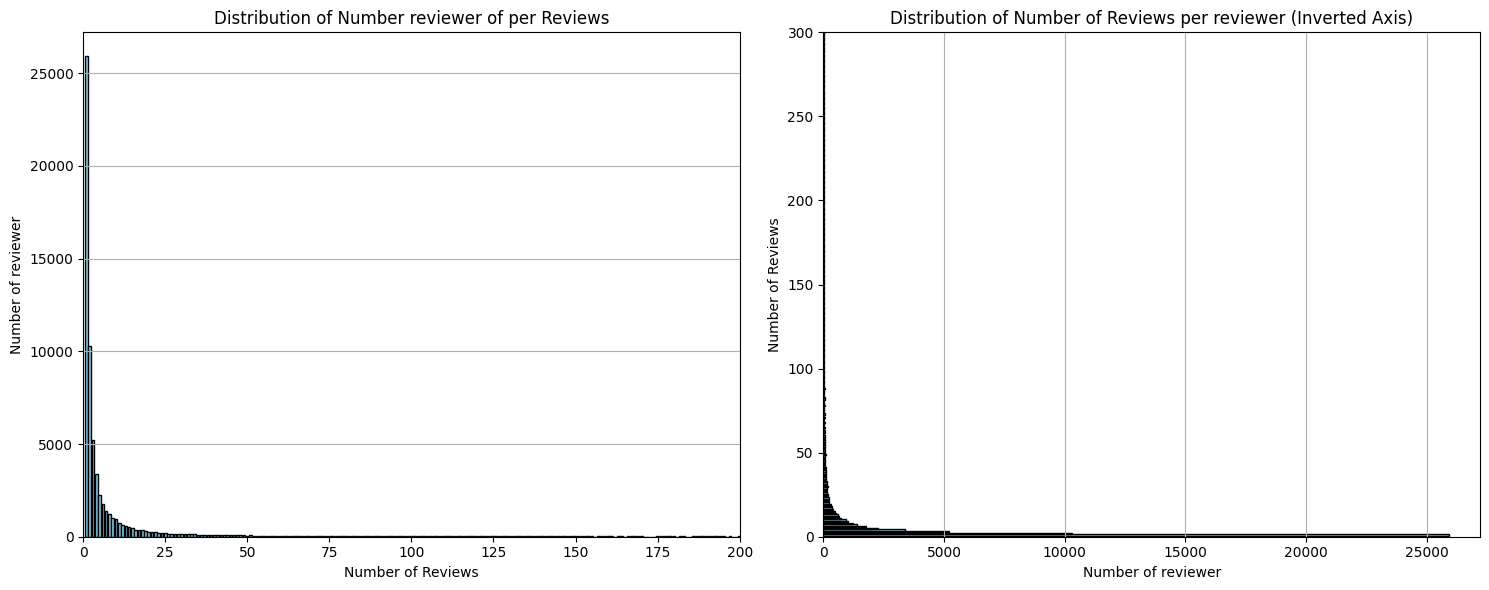

In [110]:
# Count the number of beers for each number of reviews
reviews_counts = df_users['nbr_ratings'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: Original axis
axes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Number of reviewer')
axes[0].set_title('Distribution of Number reviewer of per Reviews')
axes[0].grid(axis='y')

# Plot 2: Inverted axis
axes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of reviewer')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_title('Distribution of Number of Reviews per reviewer (Inverted Axis)')
axes[1].grid(axis='x')


axes[1].set_ylim(0, 300) 
axes[0].set_xlim(0, 200) 

plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()

In [114]:
# Choose a percentile threshold (adjust as needed)
ratings_threshold75 = df_users['nbr_ratings'].quantile(0.75)
ratings_threshold90 = df_users['nbr_ratings'].quantile(0.90)
ratings_threshold95 = df_users['nbr_ratings'].quantile(0.95)
ratings_threshold98 = df_users['nbr_ratings'].quantile(0.98)
ratings_threshold99 = df_users['nbr_ratings'].quantile(0.99)

# Filter beers based on the threshold
filtered_users75 = df_users[df_users['nbr_ratings'] >= ratings_threshold75]
filtered_users90 = df_users[df_users['nbr_ratings'] >= ratings_threshold90]
filtered_users95 = df_users[df_users['nbr_ratings'] >= ratings_threshold95]
filtered_users98 = df_users[df_users['nbr_ratings'] >= ratings_threshold98]
filtered_users99 = df_users[df_users['nbr_ratings'] >= ratings_threshold99]

print(filtered_beers75.shape,
filtered_beers90.shape,
filtered_beers95.shape,
filtered_beers98.shape,
filtered_beers99.shape)

(112028, 13) (44752, 13) (22228, 13) (8914, 13) (4428, 13)


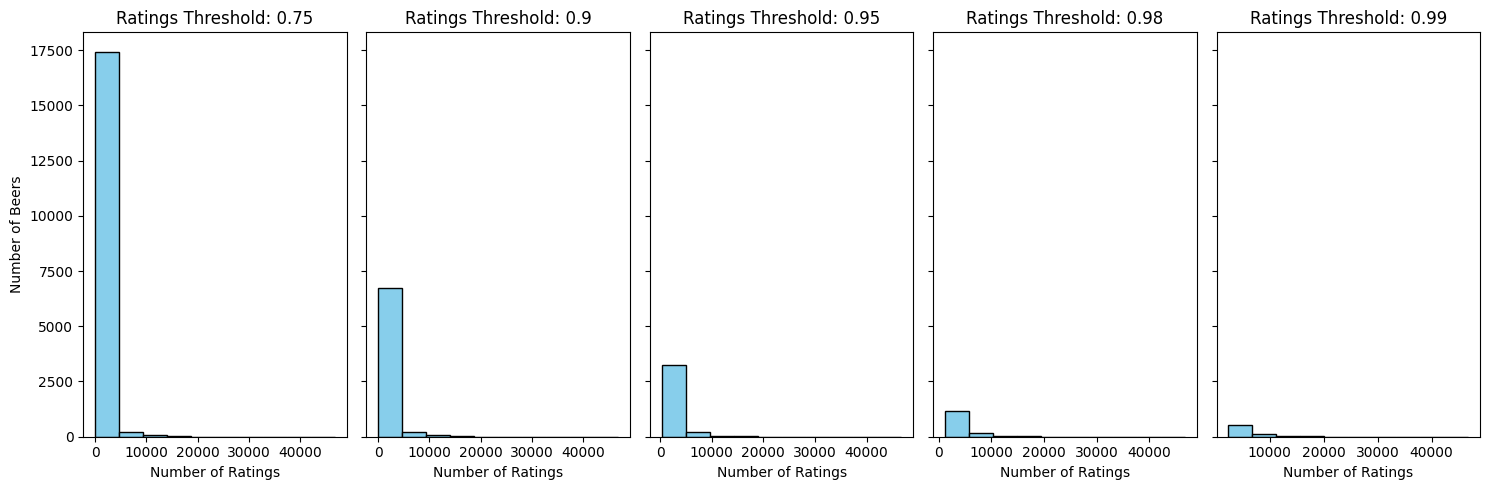

In [117]:
# Choose percentile thresholds (adjust as needed)
ratings_thresholds = [0.75, 0.90, 0.95, 0.98, 0.99]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(ratings_thresholds), figsize=(15, 5), sharey=True)

# Plot histograms for different percentile thresholds
for i, threshold in enumerate(ratings_thresholds):
    # Filter beers based on the threshold
    filtered_users = df_users[df_users['nbr_ratings'] >= df_users['nbr_ratings'].quantile(threshold)]

    # Plot the histogram
    axes[i].hist(filtered_users['nbr_ratings'], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Ratings Threshold: {threshold}')
    axes[i].set_xlabel('Number of Ratings')

# Set common y-axis label
axes[0].set_ylabel('Number of Beers')

plt.tight_layout()
plt.show()

In [118]:
# Choose the 99th percentile threshold for nbr_ratings
ratings_threshold99 = df_beer['nbr_ratings'].quantile(0.99)

# Create a new DataFrame with beers in the 99th percentile
df_filtered_users = df_users[df_users['nbr_ratings'] >= ratings_threshold99]

# Display the new DataFrame
display(df_filtered_users)

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
5,21024,227834,Beerhunter111,1.352718e+09,Germany
6,8781,83106,Erzengel,1.224324e+09,Germany
...,...,...,...,...,...
26097,376,138661,Peacehammer,1.319710e+09,"United States, California"
31541,357,281255,gkeh,1.380276e+09,"United States, Texas"
40230,356,210148,rick_91709,1.344506e+09,NaN
44330,249,33335,2beerguys,1.139483e+09,"United States, Massachusetts"


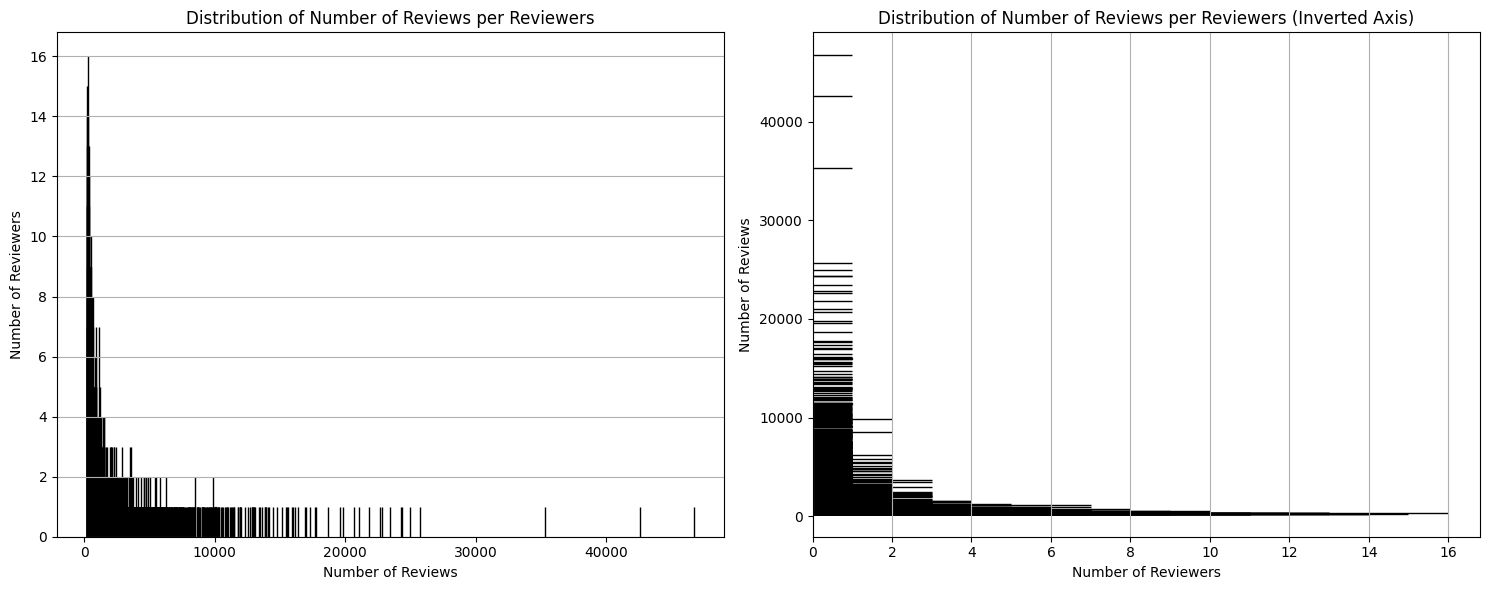

In [122]:
# Count the number of beers for each number of reviews
reviews_counts = df_filtered_users['nbr_ratings'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: Original axis
axes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Number of Reviewers')
axes[0].set_title('Distribution of Number of Reviews per Reviewers')
axes[0].grid(axis='y')

# Plot 2: Inverted axis
axes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of Reviewers')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_title('Distribution of Number of Reviews per Reviewers (Inverted Axis)')
axes[1].grid(axis='x')


#axes[1].set_ylim(0, 300) 
#axes[0].set_xlim(0, 200) 

plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()

In [112]:
#Ranking location in function of activity 
df_users['location'].value_counts().sort_values(ascending=False)

location
Canada                         3255
United States, California      2804
England                        2734
Poland                         1701
United States, Pennsylvania    1632
                               ... 
Jamaica                           1
North Korea                       1
Nagorno-Karabakh                  1
French Guiana                     1
Tibet                             1
Name: count, Length: 222, dtype: int64

In [123]:
df_filtered_users['location'].value_counts().sort_values(ascending=False)

location
Canada                       290
United States, California    208
Poland                       206
England                      174
Denmark                      169
                            ... 
Philippines                    1
Greenland                      1
Singapore                      1
Bermuda                        1
Saint Helena                   1
Name: count, Length: 124, dtype: int64

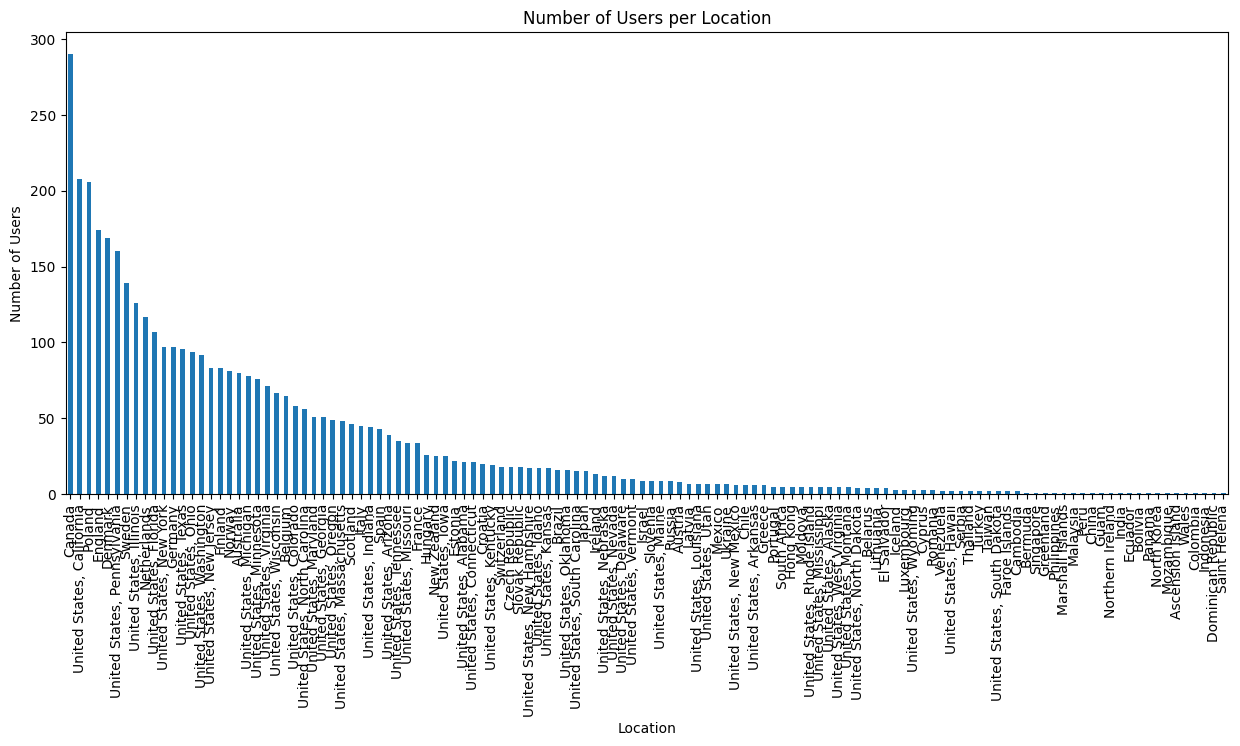

In [125]:
df_filtered_users['location'].value_counts().plot(kind='bar', figsize=(15,6))
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.title('Number of Users per Location')
plt.show()



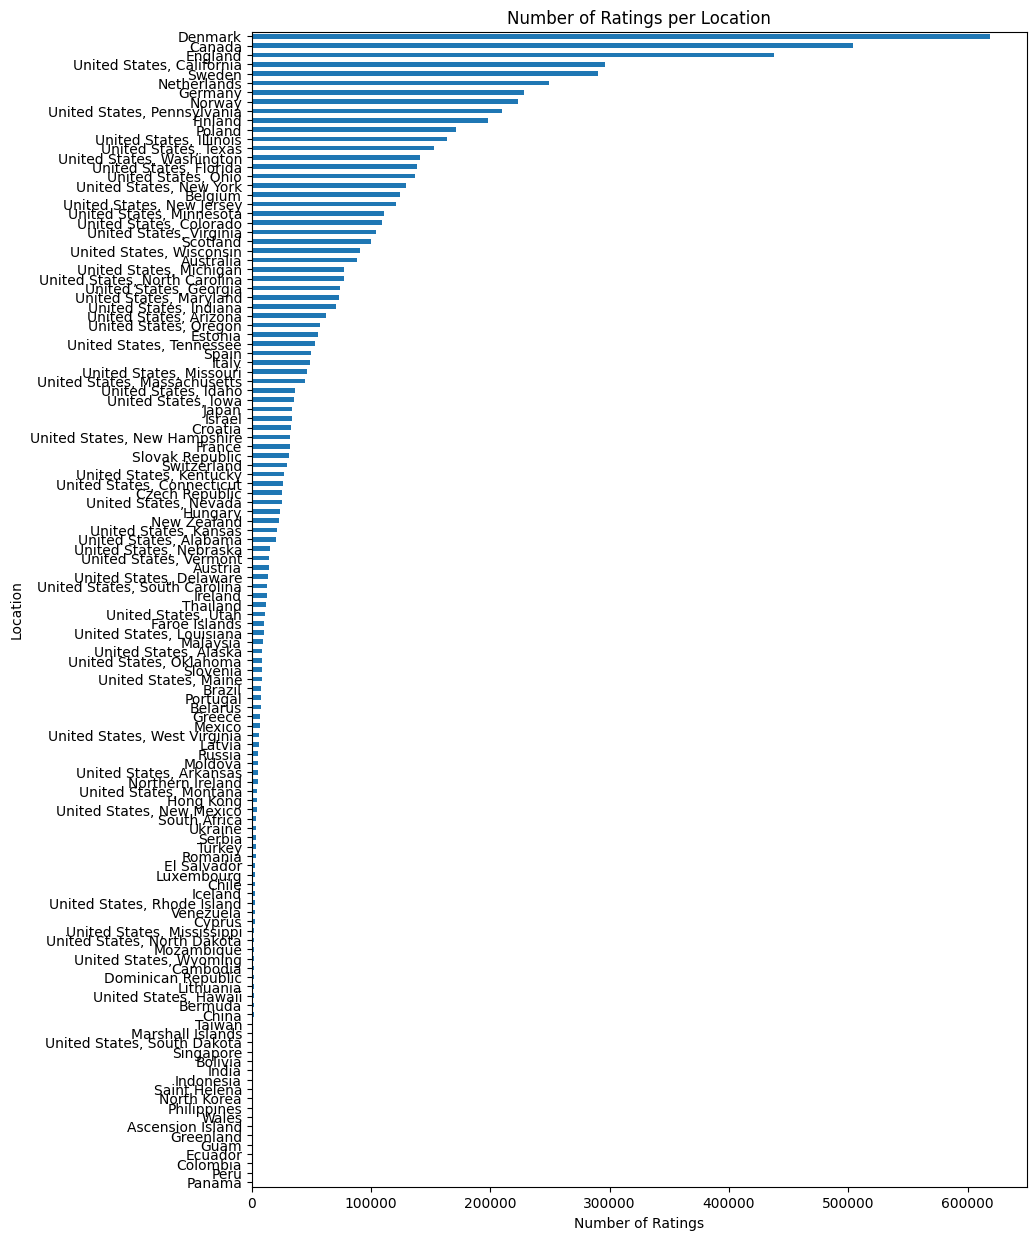

In [128]:
df_filtered_users.groupby('location')['nbr_ratings'].sum().sort_values().plot(kind='barh', figsize=(10, 15))
plt.xlabel('Number of Ratings')
plt.ylabel('Location')
plt.title('Number of Ratings per Location')
plt.show()


### New ratings with only the 99% percentile 

Ici c'est les donnees avec matched_beer 
(a retenir que c'est la seule data frame qui possede les reviews texte je crois et donc faut trouver un moyen de reseparer les donnees en deux groupes
pour avoir acces uniquement au nombre de reviews par reviewer par site, on peut aussi comparer l'activite des deux sites)
En plus, c'est aussi, je crois, seulement depuis la qu'on peut linker les user_id au beer_id  

In [18]:
df_rating = pd.read_csv("matched_beer_data/ratings.csv", header=1)
df_rating


,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,brewery_name.1,date.1,overall.1,palate.1,rating.1,style.1,taste.1,text.1,user_id.1,user_name.1
0,11.3,4.50,4.50,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.50,...,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
2,5.0,3.50,3.50,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.00,...,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
3,5.0,4.00,3.50,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.00,...,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong
4,6.0,4.00,4.00,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.00,...,Brouwerij 3 Fonteinen,1345284000,16.0,4.0,4.0,Lambic Style - Gueuze,8.0,750ml bottleBottling date: 2011/02/17 - Pours ...,98624,tiong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,8.5,4.50,3.50,28030,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.0,4.00,...,Contreras,1323946800,15.0,4.0,3.7,Abbey Tripel,7.0,Valeir Divers 33cl bottle from www.belgianbeer...,137922,TheBeerWatcher
21960,8.0,4.25,4.25,5057,Fantôme Saison,738,Brasserie Fantôme,1484046000,4.0,4.00,...,Brasserie Fantôme,1487502000,16.0,4.0,4.0,Saison,8.0,.................................................,394232,jonj
21961,5.2,NaN,NaN,349,Jupiler,134,Brasserie Piedboeuf,1393239600,NaN,NaN,...,Brasserie Piedboeuf (InBev),1393153200,1.0,1.0,1.2,Pale Lager,2.0,"Biere, foin, pain grillÃ©, terreux, banane, ca...",304802,maxilouis
21962,6.5,3.00,3.00,127162,Redenaar,32560,Brouwerij d'Oude Maalderij,1419764400,3.0,2.75,...,dOude Maalderij,1397037600,17.0,3.0,3.9,Belgian Ale,8.0,This is the first blond ale from this brewery....,276666,simoen


In [129]:
df_rating.columns

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name', 'abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1'],
      dtype='object')

In [156]:
# Only taking the part of the data frame which comes from RateBeer 
df_ratings_RateBeer = df_rating.loc[:, 'abv.1':'user_name.1']
df_ratings_RateBeer


,abv.1,appearance.1,aroma.1,beer_id.1,beer_name.1,brewery_id.1,brewery_name.1,date.1,overall.1,palate.1,rating.1,style.1,taste.1,text.1,user_id.1,user_name.1
0,11.3,4.0,10.0,2360,Rochefort Trappistes 10,406,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
1,5.0,2.0,3.0,17109,Myanmar Lager Beer,2921,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
2,5.0,4.0,8.0,35298,Cantillon Tyrnilambic Baie dArgousier,1069,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
3,5.0,4.0,8.0,113596,Cantillon Pikkulinnun Viskilambic,1069,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong
4,6.0,4.0,8.0,173481,3 Fonteinen Oude Geuze (Armand & Tommy),2058,Brouwerij 3 Fonteinen,1345284000,16.0,4.0,4.0,Lambic Style - Gueuze,8.0,750ml bottleBottling date: 2011/02/17 - Pours ...,98624,tiong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,8.5,4.0,7.0,56990,Contreras Valeir Divers,1954,Contreras,1323946800,15.0,4.0,3.7,Abbey Tripel,7.0,Valeir Divers 33cl bottle from www.belgianbeer...,137922,TheBeerWatcher
21960,8.0,4.0,8.0,7661,Fantôme Saison,1289,Brasserie Fantôme,1487502000,16.0,4.0,4.0,Saison,8.0,.................................................,394232,jonj
21961,5.2,5.0,3.0,8042,Jupiler,2004,Brasserie Piedboeuf (InBev),1393153200,1.0,1.0,1.2,Pale Lager,2.0,"Biere, foin, pain grillÃ©, terreux, banane, ca...",304802,maxilouis
21962,6.5,3.0,8.0,248989,dOude Maalderij Redenaar,15326,dOude Maalderij,1397037600,17.0,3.0,3.9,Belgian Ale,8.0,This is the first blond ale from this brewery....,276666,simoen


In [168]:
df_ratings_RateBeer['user_id.1'].value_counts()



user_id.1
11905     1784
60182      801
105791     767
114306     750
274310     598
          ... 
166361       1
313692       1
418108       1
13570        1
75285        1
Name: count, Length: 879, dtype: int64

In [ ]:
#Find a way to link the beer_id to the user_id, try to compare and find the X best beers for each user, try to plot that, and keep only the Y in common best beers for all users.


In [193]:
# Filter the data for user_id.1 = 11905
df_filtered = df_ratings_RateBeer[df_ratings_RateBeer['user_id.1'] == 11905]
# Group the data by beer_id.1 and get the top 10 beer_id.1 with the highest overall.1
df_top_beers = df_filtered.groupby('beer_id.1')['overall.1'].nlargest(10)
df_top_beers

beer_id.1      
13         7797    14.0
15         8644    15.0
189        8813    10.0
528        7999    11.0
529        7988     9.0
                   ... 
529944     7426    15.0
529985     7772    14.0
531108     8784    16.0
532500     8718     8.0
534864     7838    10.0
Name: overall.1, Length: 1784, dtype: float64

In [206]:
# Filter the data for user_id.1 = 11905
df_filtered = df_ratings_RateBeer[df_ratings_RateBeer['user_id.1'] == 11905]
# Group the data by beer_id.1 and get the top 10 beer_id.1 with the highest overall.1
df_top_beers = df_filtered.groupby(['beer_id.1', 'beer_name.1'])['overall.1'].nlargest(10).reset_index()
# Get the first 10 different beer_id.1 and beer_name.1
df_top_beers = df_top_beers[['beer_id.1', 'beer_name.1', 'overall.1']].drop_duplicates().head(10)
print(df_top_beers)


   beer_id.1                              beer_name.1  overall.1
0         13                            Alaskan Amber       14.0
1         15                              Alaskan ESB       15.0
2        189                          Stiegl Goldbräu       10.0
3        528                           Brooklyn Lager       11.0
4        529                       Brooklyn Brown Ale        9.0
5        531           Brooklyn Black Chocolate Stout       16.0
6        534                        Brooklyner Weisse       16.0
7        540                 Middle Ages Beast Bitter       12.0
8        586  Rogue XS Imperial India Pale Ale (I²PA)       17.0
9        588                  Rogue Irish Style Lager       11.0


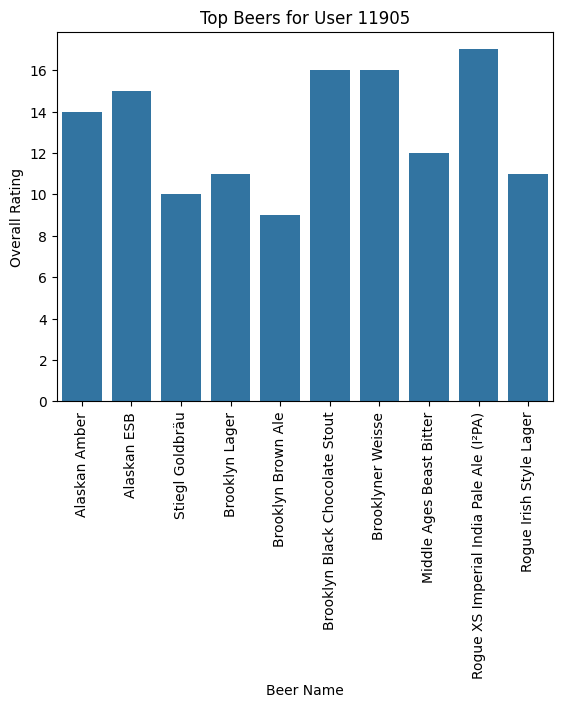

In [207]:
import seaborn as sns

# Create a barplot with beer_name.1 in df_top_beers and the associated overall.1 value
sns.barplot(x='beer_name.1', y='overall.1', data=df_top_beers)
plt.xticks(rotation=90)
plt.xlabel('Beer Name')
plt.ylabel('Overall Rating')
plt.title('Top Beers for User 11905')
plt.show()


In [ ]:
# Trying to do the same for the 15 most active users

In [224]:
# Get the top 15 users based on the number of reviews
top_users = df_ratings_RateBeer['user_id.1'].value_counts().nlargest(15).index

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['user_id', 'beer_id', 'beer_name', 'overall_rating'])

# Iterate over the top users and collect data for the result DataFrame
for user_id in top_users:
    # Filter data for the current user
    df_filtered = df_ratings_RateBeer[df_ratings_RateBeer['user_id.1'] == user_id]
    
    # Group the data by beer_id.1 and get the top 10 beer_id.1 with the highest overall.1
    df_top_beers = df_filtered.groupby(['beer_id.1', 'beer_name.1'])['overall.1'].nlargest(10).reset_index()
    # Get the first 10 different beer_id.1 and beer_name.1
    df_top_beers = df_top_beers[['beer_id.1', 'beer_name.1', 'overall.1']].drop_duplicates().head(10)
    
    # Append the data to the result DataFrame
    result_df = pd.concat([result_df, df_top_beers.assign(user_id=user_id)], ignore_index=True)

# Display the result DataFrame
result_df.drop(columns=['beer_id', 'beer_name', 'overall_rating'], inplace=True)
result_df

,user_id,beer_id.1,beer_name.1,overall.1
0,11905,13.0,Alaskan Amber,14.0
1,11905,15.0,Alaskan ESB,15.0
2,11905,189.0,Stiegl Goldbräu,10.0
3,11905,528.0,Brooklyn Lager,11.0
4,11905,529.0,Brooklyn Brown Ale,9.0
...,...,...,...,...
145,367394,2529.0,St. Bernardus Pater 6,13.0
146,367394,2531.0,St. Bernardus Prior 8,17.0
147,367394,3735.0,Affligem Dubbel,13.0
148,367394,3922.0,Efes Pilsen (Pilsener),12.0


/var/folders/qg/37jvbp457tq2br3zyywkt38c0000gn/T/ipykernel_568/201214675.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)
/var/folders/qg/37jvbp457tq2br3zyywkt38c0000gn/T/ipykernel_568/201214675.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)
/var/folders/qg/37jvbp457tq2br3zyywkt38c0000gn/T/ipykernel_568/201214675.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)
/var/folders/qg/37jvbp457tq2br3zyywkt38c0000gn/T/ipykernel_568/201214675.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)
/var/folders/qg/37jvbp457tq2br3zyywkt38c0000gn/T/ipykernel_5

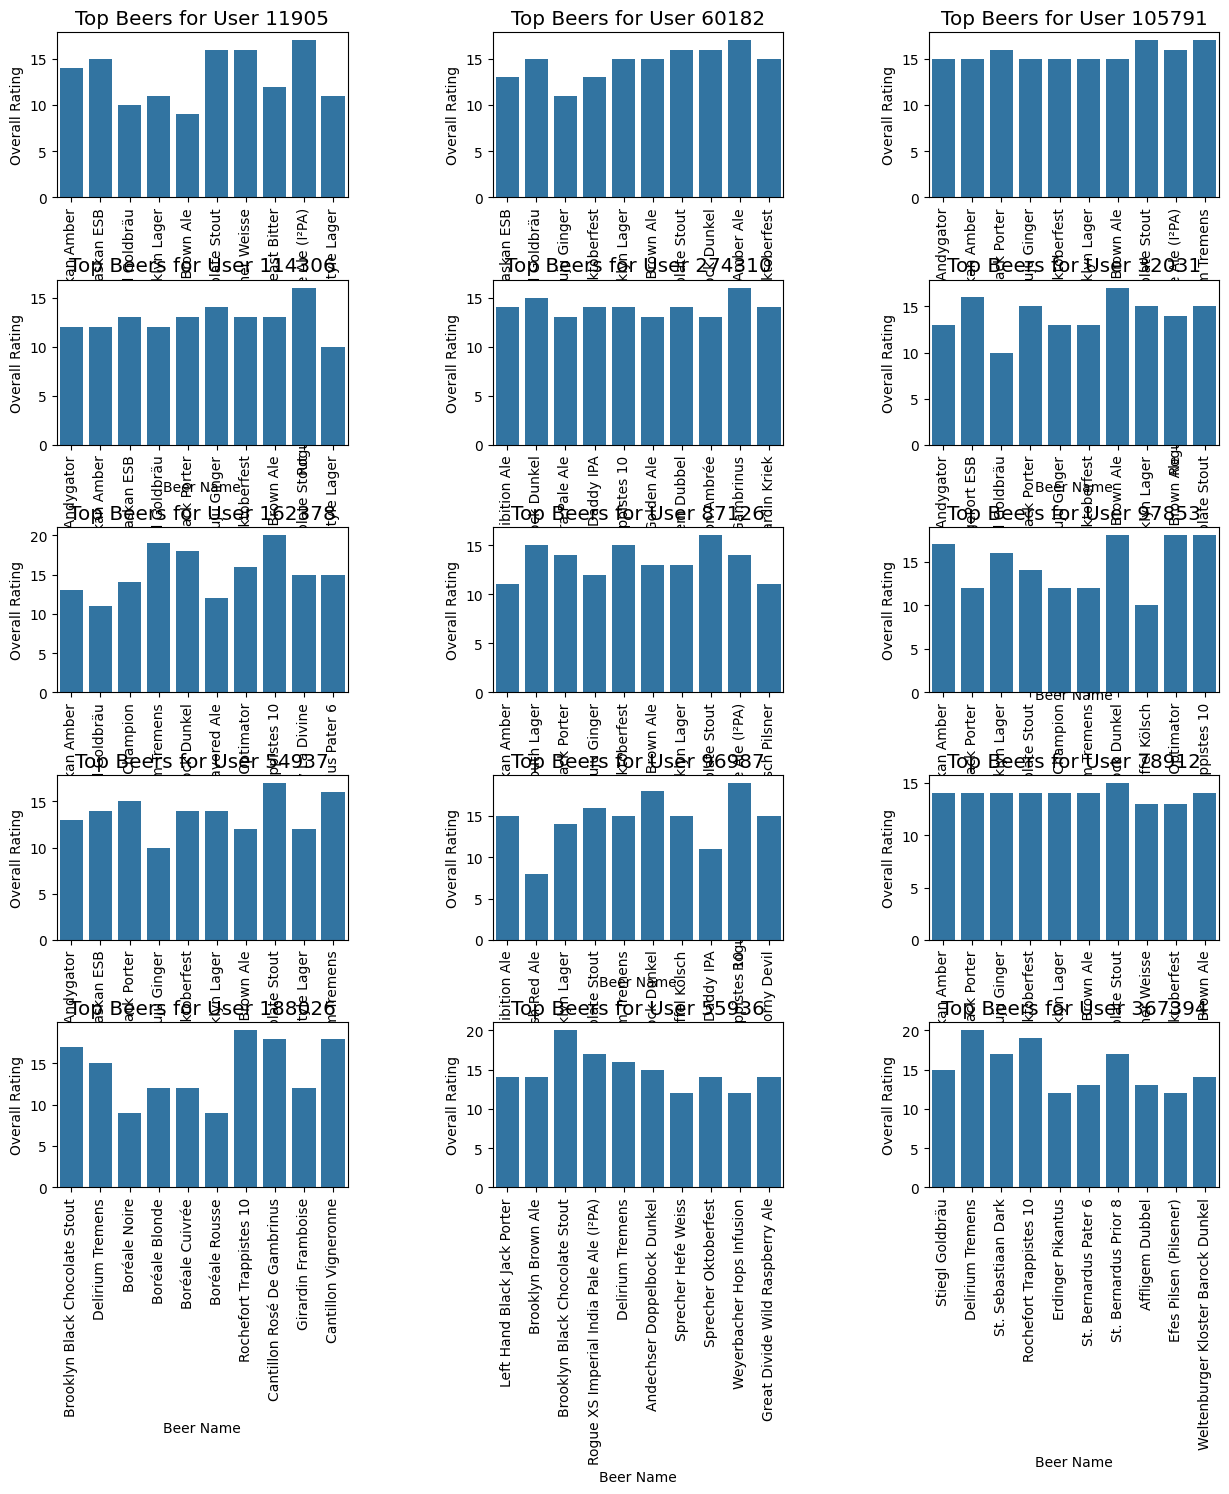

In [225]:
# Get the top 15 users based on the number of reviews
top_users = df_ratings_RateBeer['user_id.1'].value_counts().nlargest(15).index.tolist()

# Create subplots for the top 15 users with adjusted layout
nrows = 5
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.style.use('ggplot')

# Iterate over the top users and create a subplot for each user
for i, user_id in enumerate(top_users):
    # Calculate the row and column index for the current subplot
    row = i // ncols
    col = i % ncols
    
    # Filter data for the current user
    df_filtered = df_ratings_RateBeer[df_ratings_RateBeer['user_id.1'] == user_id]
    
    # Group the data by beer_id.1 and get the top 10 beer_id.1 with the highest overall.1
    df_top_beers = df_filtered.groupby(['beer_id.1', 'beer_name.1'])['overall.1'].nlargest(10).reset_index()
    df_top_beers = df_top_beers[['beer_id.1', 'beer_name.1', 'overall.1']].drop_duplicates().head(10)
    
    # Plot the bar chart in the current subplot
    sns.barplot(x='beer_name.1', y='overall.1', data=df_top_beers, ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)
    axes[row, col].set_xlabel('Beer Name')
    axes[row, col].set_ylabel('Overall Rating')
    axes[row, col].set_title(f'Top Beers for User {user_id}')

plt.show()


In [12]:
"""
# drop every row without text if NaN
df_rating_without_text = df_rating.copy(deep=True)
df_rating_without_text.dropna(subset=['text'])
print(df_rating_without_text.shape)
# convert the date column to datetime format
df_rating_without_text['date'] = pd.to_datetime(df_rating['date'], unit='s')
"""


(21964, 33)


In [ ]:
# Voir l'evolution des bieres, commentaires, ratings sur une biere (surtout les meilleures surement)


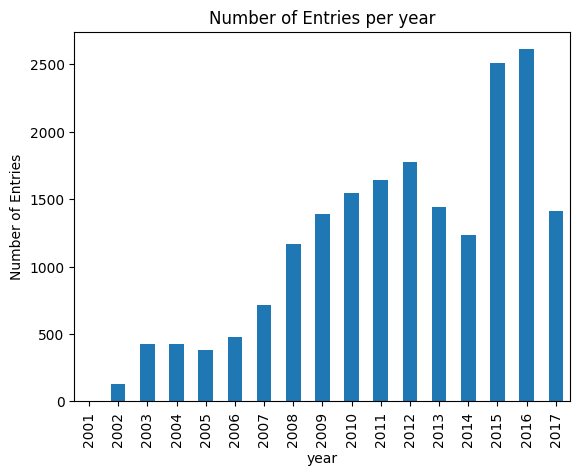

In [20]:
# Group by year using date, count the number of entries per date, and plot
df_rating['date'] = pd.to_datetime(df_rating['date'], unit='s')
df_rating.groupby(df_rating['date'].dt.year).count()['overall'].plot(kind='bar')

# Display the plot
plt.xlabel('year')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per year')
plt.show()